## Son Pham
- ASEN 6060 
- Hw 1

In [1]:
# using IJulia
# notebook()

In [2]:
# helper files

begin
	include("../helpers/constants.jl")
end

# below is what's in the constants.jl file
# # earth
# mass_earth = 5.9722e24 # kg
# gm_earth = 398600.435436 # km3/s2
# sma_earth_wrtsun = 149598023 # km
# ecc_earth_wrtsun = 0.016708617

# # moon
# mass_moon = 0.07346e24 # kg
# gm_moon = 4902.800066 # km3/s2
# sma_moon_wrtearth = 384400 # km
# ecc_moon_wrtearth = 0.05490

# # sun
# mass_sun = 1988500e24 # kg
# gm_sun = 132712440041.93938; # km3/s2

1.3271244004193938e11

## Problem 1

#### Calculate the mass ratio and characteristic quantities for each of the Earth-Moon and Sun-Earth systems. Discuss whether you expect the CR3BP to be a reasonable approximation of the dynamical environment governing the motion of a spacecraft in each of these systems and why.

In [3]:
begin
    
    ## earth-moon
    # characteristic mass
    m_star_earthmoon = mass_earth + mass_moon
    mu_earthmoon = mass_moon / m_star_earthmoon
    M2_earthmoon_nondim = mu_earthmoon
    M1_earthmoon_nondim = 1 - mu_earthmoon
    println("Problem 1:")
    println("mass ratio (earth-moon): ", mu_earthmoon)
    println("characteristic mass (earth-moon): ", m_star_earthmoon)

    # characteristic length
    r1_earth2bary = 4670 # km
    r2_moon2bary = sma_moon_wrtearth - r1_earth2bary
    l_star_earthmoon = r1_earth2bary + r2_moon2bary
    println("characteristic length (earth-moon): ", l_star_earthmoon)

    # characteristic time
    t_star_earthmoon = (l_star_earthmoon^3 / (gm_earth + gm_moon))^0.5
    println("characteristic time (earth-moon): ", t_star_earthmoon)
    println()
    
    ## sun-earth
    # characteristic mass
    m_star_sunearth = mass_sun + mass_earth
    mu_sunearth = mass_earth / m_star_sunearth
    M2_sunearth_nondim = mu_sunearth
    M1_sunearth_nondim = 1 - mu_sunearth
    println("mass ratio (sun-earth): ", mu_sunearth)
    println("characteristic mass (sun-earth): ", m_star_sunearth)

    # characteristic length
    l_star_sunearth = sma_earth_wrtsun
    println("characteristic length (sun-earth): ", l_star_sunearth)

    # characteristic time
    t_star_sunearth = (l_star_sunearth^3 / (gm_sun + gm_earth))^0.5
    println("characteristic time (sun-earth): ", t_star_sunearth)
    
end

Problem 1:
mass ratio (earth-moon): 0.012150865248790041
characteristic mass (earth-moon): 6.04566e24
characteristic length (earth-moon): 384400
characteristic time (earth-moon): 375190.26195184357

mass ratio (sun-earth): 3.0033603536994196e-6
characteristic mass (sun-earth): 1.9885059722e30
characteristic length (sun-earth): 149598023
characteristic time (sun-earth): 4531.839808982943


## Problem 2

#### a. Write a script to numerically integrate the equations of motion for the CR3BP using a nondimensional state vector defined in the rotating frame. In your writeup, discuss and justify your specific choice of integration scheme, the definition of any tolerances used during numerical integration, and the value you selected for these tolerances. Copy the text of your script to the end of this subproblem.

In [4]:
begin
    using DifferentialEquations
    using LinearAlgebra
    using Plots
end

In [5]:
function crtbp(dx,x,mu,t)
    # mu = mu_earthmoon

    # positions of primaries to third body
    r1 = ((x[1]+mu)^2 + x[2]^2 + x[3]^2)^0.5
    r2 = ((x[1]-1+mu)^2 + x[2]^2 + x[3]^2)^0.5

    # derivatives
    dx[1] = x[4]
    dx[2] = x[5]
    dx[3] = x[6]
    dx[4] = 2*x[5] + x[1] - (1-mu)*(x[1]+mu)/r1^3 - (mu*(x[1]-1+mu))/r2^3
    dx[5] = -2*x[4] + x[2] - (1-mu)*x[2]/r1^3 - mu*x[2]/r2^3
    dx[6] = -(1-mu)*x[3]/r1^3 - mu*x[3]/r2^3

end

crtbp (generic function with 1 method)

## Problem 2

#### b. Numerically integrate the following initial conditions forward in time for the stated integration times in the Earth-Moon CR3BP:
- i. Initial Condition #1: 𝑥̅= [0.98, 0, 0, 0, 1.2,0] nondimensional units, Integration Time: 2 nondimensional units 
- ii. Initial Condition #2: 𝑥̅= [0.98, 0, 0, 0, 1.7,0] nondimensional units, Integration Time: 8 nondimensional units 
- iii. Initial Condition #3: 𝑥̅= [0.12, 0, 0, 0, 3.45,0] nondimensional units, Integration Time: 25 nondimensional units 
- iv. Initial Condition #4: 𝑥̅= [0.12, 0, 0, 0, 3.48,0] nondimensional units, Integration Time: 25 nondimensional units   

#### Plot the associated nondimensional trajectories in the configuration space. Add any information that you think would be useful to the plot of each trajectory. Discuss the characteristics of each trajectory. Then, justify, using any relevant additional information, quantities, or data, whether each trajectory is likely to closely approximate a true solution in the CR3BP.

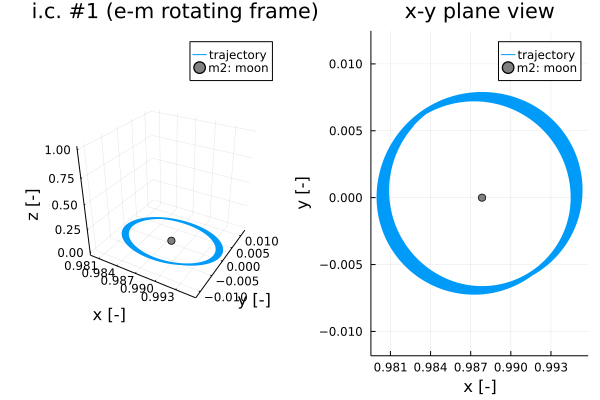

In [6]:
begin
    # initial condition 1
    x_bar = [0.98, 0, 0, 0, 1.2,0]
    
    # 2 nondimensional units
    tspan = (0.0,2.0)

    # setting up solver
    prob = ODEProblem(crtbp, x_bar, tspan, mu_earthmoon)
    sol = solve(prob, Tsit5(), reltol=1e-12, abstol=1e-12, maxiters=1e6)
    
    # 3d plot in earth-moon rotating frame
    plot(sol[1,:], sol[2,:], sol[3,:], label="trajectory", title=" i.c. #1 (e-m rotating frame)", 
        xlabel="x [-]", ylabel="y [-]", zlabel="z [-]", layout = 2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], [0], color="gray", markersize = 4, label="m2: moon")

    # 2d plot in earth-moon rotating frame
    plot!(sol[1,:], sol[2,:], label="trajectory", title="x-y plane view", 
        xlabel="x [-]", ylabel="y [-]", subplot=2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], color="gray", markersize = 4, label="m2: moon", subplot=2)
    
end

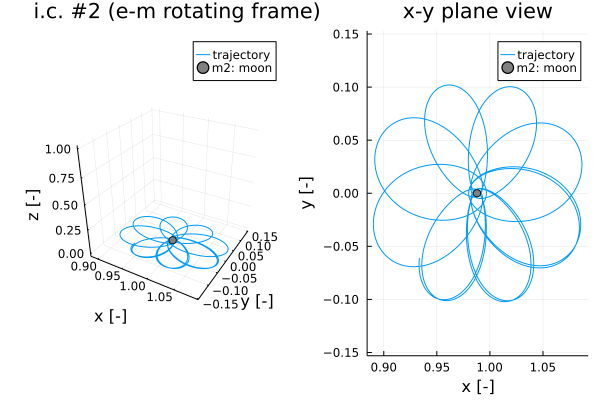

In [7]:
begin
    # initial condition 2
    x_bar2 = [0.98; 0; 0; 0; 1.7; 0]

    # 8 nondimensional units
    tspan2 = (0.0,8.0)

    # setting up solver
    prob2 = ODEProblem(crtbp, x_bar2, tspan2, mu_earthmoon)
    sol2 = solve(prob2, Tsit5(), reltol=1e-12, abstol=1e-12, maxiters=1e6)
    
    # 3d plot in earth-moon rotating frame
    plot(sol2[1,:], sol2[2,:], sol2[3,:], label="trajectory", title=" i.c. #2 (e-m rotating frame)", 
        xlabel="x [-]", ylabel="y [-]", zlabel="z [-]", layout = 2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], [0], color="gray", markersize = 4, label="m2: moon")

    # 2d plot in earth-moon rotating frame
    plot!(sol2[1,:], sol2[2,:], label="trajectory", title="x-y plane view", 
        xlabel="x [-]", ylabel="y [-]", subplot=2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], color="gray", markersize = 4, label="m2: moon", subplot=2)
    
end

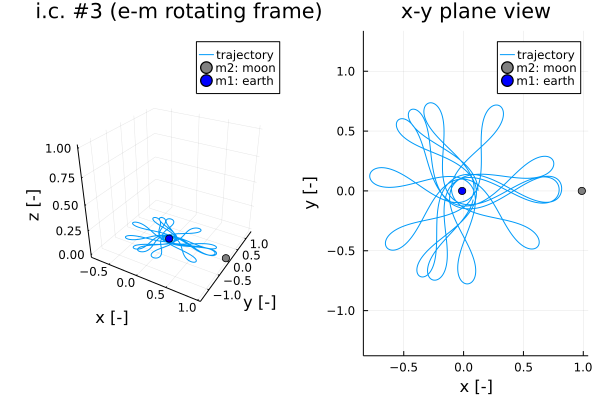

In [8]:
begin
    
    # initial condition 3
    x_bar3 = [0.12; 0; 0; 0; 3.45; 0]

    # 25 nondimensional units
    tspan3 = (0.0,25.0)

    # setting up solver
    prob3 = ODEProblem(crtbp, x_bar3, tspan3, mu_earthmoon)
    sol3 = solve(prob3, Tsit5(), reltol=1e-12, abstol=1e-12, maxiters=1e6)
    
    # 3d plot in earth-moon rotating frame
    plot(sol3[1,:], sol3[2,:], sol3[3,:], label="trajectory", title=" i.c. #3 (e-m rotating frame)", 
        xlabel="x [-]", ylabel="y [-]", zlabel="z [-]", layout = 2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], [0], color="gray", markersize = 4, label="m2: moon")
    
    # adding the earth
    scatter!([-mu_earthmoon],[0], [0], color="blue", markersize = 4, label="m1: earth")
    
    # 2d plot in earth-moon rotating frame
    plot!(sol3[1,:], sol3[2,:], label="trajectory", title="x-y plane view", 
        xlabel="x [-]", ylabel="y [-]", subplot=2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], color="gray", markersize = 4, label="m2: moon", subplot=2)
    
    # adding the earth
    scatter!([-mu_earthmoon],[0], color="blue", markersize = 4, label="m1: earth", subplot=2)
    
end

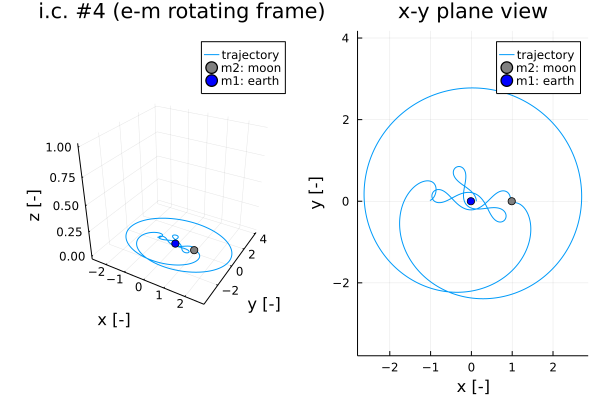

In [9]:
begin
    
    # initial condition 4
    x_bar4 = [0.12; 0; 0; 0; 3.48; 0]

    # 25 nondimensional units
    tspan4 = (0.0,25.0)

    # setting up solver
    prob4 = ODEProblem(crtbp, x_bar4, tspan4, mu_earthmoon)
    sol4 = solve(prob4, Tsit5(), reltol=1e-12, abstol=1e-12, maxiters=1e6)
    
    # 3d plot in earth-moon rotating frame
    plot(sol4[1,:], sol4[2,:], sol4[3,:], label="trajectory", title=" i.c. #4 (e-m rotating frame)", 
        xlabel="x [-]", ylabel="y [-]", zlabel="z [-]", layout = 2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], [0], color="gray", markersize = 4, label="m2: moon")
    
    # adding the earth
    scatter!([-mu_earthmoon],[0], [0], color="blue", markersize = 4, label="m1: earth")
    
    # 2d plot in earth-moon rotating frame
    plot!(sol4[1,:], sol4[2,:], label="trajectory", title="x-y plane view", 
        xlabel="x [-]", ylabel="y [-]", subplot=2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], color="gray", markersize = 4, label="m2: moon", subplot=2)
    
    # adding the earth
    scatter!([-mu_earthmoon],[0], color="blue", markersize = 4, label="m1: earth", subplot=2)

end

## Problem 2

#### c. Convert initial condition #3 and the associated integration time into dimensional quantities and report them in useful units. In addition, how far is the spacecraft located from the Earth at the initial time? How many orbital periods of the primary system is the integration time equivalent to?

In [10]:
function T_r_2_nrtl(vec, t)
    
    # transformation matrices
    T_r2nrtl = [cos(t)  -sin(t)  0; sin(t)  cos(t) 0; 0 0 1]
    T_dot_r2nrtl = [-sin(t) -cos(t) 0; cos(t) -sin(t) 0; 0 0 0]
    
    # matrix multiplication
    r_nrtl = T_r2nrtl * vec[1:3]
    v_nrtl = T_r2nrtl * vec[4:6] + T_dot_r2nrtl * vec[1:3]

    # combine into single vector
    return reduce(vcat, (r_nrtl, v_nrtl))
    
end

T_r_2_nrtl (generic function with 1 method)

Problem 2.c.:
- initial position [x,y,z]: [46128.0, 0.0, 0.0] (km)
- initial velocity [x,y,z]: [0.0, 3.6576322446666767, 0.0] (km/s)
- number of orbits: 3.97886427298192
- distance from earth (altitude): 44427.0 [km]



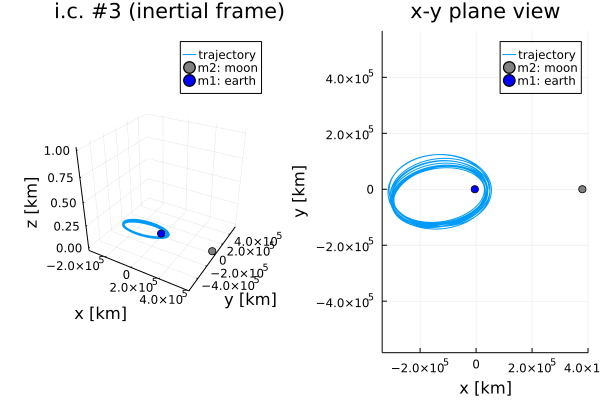

In [11]:
begin
    
    # initial condition 3
    x_bar3 = [0.12; 0; 0; 0; 3.45; 0]

    # 25 nondimensional units
    tspan3 = (0.0,25.0)

    # setting up solver
    prob3 = ODEProblem(crtbp, x_bar3, tspan3, mu_earthmoon)
    sol3 = solve(prob3, Tsit5(), reltol=1e-12, abstol=1e-12, maxiters=1e6)
    
    # making copies of solution
    sol3_y = sol3[:]
    sol3_t = sol3.t

    # rotating states from rotating to inertial frame
    sol3_nrtl = [T_r_2_nrtl(vec, t) for (vec, t) in zip(sol3_y, sol3_t)]
    sol3_nrtl = hcat(sol3_nrtl...)'
    
    # dimensionalizing solution
    sol3_nrtl[:, 1:3] = sol3_nrtl[:, 1:3] * l_star_earthmoon
    sol3_nrtl[:, 4:6] = sol3_nrtl[:, 4:6] * l_star_earthmoon / t_star_earthmoon
    
    # printing useful data
    pos = sol3_nrtl[1, 1:3]
    vel = sol3_nrtl[1, 4:6]
    alt = pos[1]+ r1_earth2bary - 6371.0
    println("Problem 2.c.:")
    println("- initial position [x,y,z]: $pos (km)")
    println("- initial velocity [x,y,z]: $vel (km/s)")
    println("- number of orbits: $(tspan3[2]/(2*3.1416))")
    println("- distance from earth (altitude): $alt [km]")
    println()

    # 3d plot in earth-moon rotating frame
    plot(sol3_nrtl[:, 1], sol3_nrtl[:, 2], sol3_nrtl[:, 3], label="trajectory", 
        title=" i.c. #3 (inertial frame)", 
        xlabel="x [km]", ylabel="y [km]", zlabel="z [km]", layout = 2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([r2_moon2bary],[0], [0], color="gray", markersize = 4, label="m2: moon")
    
    # adding the earth
    scatter!([-r1_earth2bary],[0], [0], color="blue", markersize = 4, label="m1: earth")
    
    # 2d plot in earth-moon rotating frame
    plot!(sol3_nrtl[:, 1], sol3_nrtl[:, 2], label="trajectory", title="x-y plane view", 
        xlabel="x [km]", ylabel="y [km]", subplot=2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([r2_moon2bary],[0], color="gray", markersize = 4, label="m2: moon", subplot=2)
    
    # adding the earth
    scatter!([-r1_earth2bary],[0], color="blue", markersize = 4, label="m1: earth", subplot=2)

end

## Problem 3

#### a) Write a second script to numerically integrate the equations of motion for the CR3BP until a stopping condition is satisfied (another way to state this is “until a specific event occurs”). In this problem, let’s define the stopping condition as the first occurrence of y=0 along the trajectory, with 𝑦̇ > 0. Submit the text of your script for this subproblem submission.

#### b) Numerically integrate initial condition #3 listed in Problem 2b) until the stopping condition defined in Problem 3a). List the state vector at the stopping condition and the associated integration time.

Problem #3b: 
state at stopping point [x,y,z,x',y',z']: 
[0.41756140431798755, -4.1644271458819544e-5, 0.0, 1.116815158400201, 0.6907907006544474, 0.0]
integration time: 2.2690836924997124



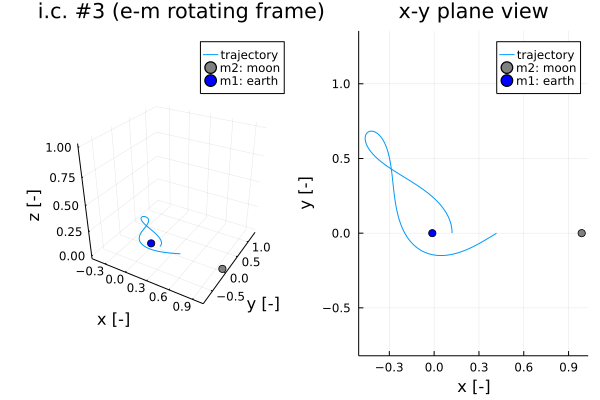

In [12]:
begin
    
    # callback condition to terminate at y=0
    condition1(x,t,integrator) = x[2]
    affect1!(integrator) = terminate!(integrator)
    cb1 = ContinuousCallback(condition1,affect1!, save_positions=(true,true),)
        
    # callback condition to terminate at given conditions:
    # ydot > 0, -0.001 < y < 1e-6
    condition2(x,t,integrator) = x[5] > 0 && x[2] < 1e-4 && x[2] > -1e-4
    affect2!(integrator) = terminate!(integrator)
    cb2 = DiscreteCallback(condition2, affect2!, save_positions=(true,true),)

    # combining callbacks (not used)
    cbs = CallbackSet(cb1,cb2)
    
    # initial condition 3
    x_bar3 = [0.12; 0; 0; 0; 3.45; 0]

    # 25 nondimensional units
    tspan3 = (0.0,25.0)
    
    # setting up solver
    prob3 = ODEProblem(crtbp, x_bar3, tspan3, mu_earthmoon)
    sol3 = solve(prob3, Tsit5(), callback=cb2, reltol=1e-14, abstol=1e-14, maxiters=1e6)    
    println("Problem #3b: ")
    println("state at stopping point [x,y,z,x',y',z']: ")
    println("$(last(sol3))")
    println("integration time: $(last(sol3.t))")
    println()
    
    # 3d plot in earth-moon rotating frame
    plot(sol3[1,:], sol3[2,:], sol3[3,:], label="trajectory", title=" i.c. #3 (e-m rotating frame)", 
        xlabel="x [-]", ylabel="y [-]", zlabel="z [-]", layout = 2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], [0], color="gray", markersize = 4, label="m2: moon")
    
    # adding the earth
    scatter!([-mu_earthmoon],[0], [0], color="blue", markersize = 4, label="m1: earth")
    
    # 2d plot in earth-moon rotating frame
    plot!(sol3[1,:], sol3[2,:], label="trajectory", title="x-y plane view", 
        xlabel="x [-]", ylabel="y [-]", subplot=2, aspect_ratio = 1)
    
    # adding the moon
    scatter!([1-mu_earthmoon],[0], color="gray", markersize = 4, label="m2: moon", subplot=2)
    
    # adding the earth
    scatter!([-mu_earthmoon],[0], color="blue", markersize = 4, label="m1: earth", subplot=2)
    
end

## Problem 4

#### a) Write a script to compute the zero velocity curves at a single value of the Jacobi constant. Note: there may be multiple methods for computing this information! In your writeup, discuss the procedure you used to calculate this information and justify the selection of any parameters or checks that govern this procedure, where relevant. Copy the text of your script to your submission for this subproblem.

In [13]:
function pseudopotential(M1_earthmoon_nondim, M2_earthmoon_nondim, mu_earthmoon, x, y)
    
    # renaming params
    m1 = M1_earthmoon_nondim
    m2 = M2_earthmoon_nondim
    
    # distances of primaries to third body
    r1 = ((x+mu_earthmoon)^2 + y^2)^0.5
    r2 = ((x-1+mu_earthmoon)^2 + y^2)^0.5
    
    # pseudo-potential function
    U = 1/2*(x^2 + y^2) + m1/r1 + m2/r2
    
    return U
    
end

pseudopotential (generic function with 1 method)

## Problem 4

#### b) Plot, in the rotating frame, the zero velocity curves in the plane of the primaries in the Earth-Moon CR3BP at the following Jacobi constants: 1) 3.189, 2) 3.173, 3) 3.013, and 4) 2.995. Add any additional information that you think might be useful to these plots.

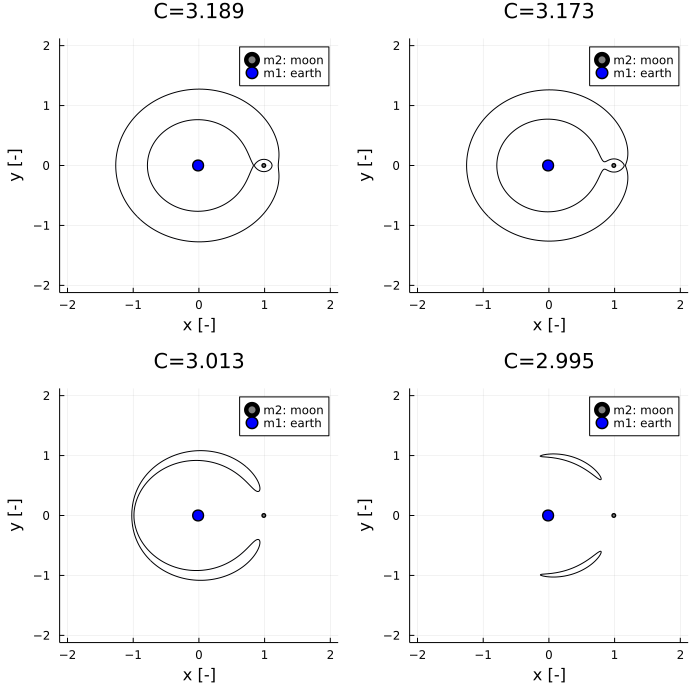

In [14]:
# creating x,y sets
x = -2:0.01:2
y = -2:0.01:2
# # X, Y = meshgrid(x, y)

# creating pseudo-energy grid
z = zeros(length(x),length(y))

# looping through x,y sets to generate jacobian grid
for (i, xi) in enumerate(x)
    for (j, yj) in enumerate(y)
      
        z[j, i] = 2 * pseudopotential(M1_earthmoon_nondim, M2_earthmoon_nondim, mu_earthmoon, xi, yj)
    
    end
end

# defining jacobi constants
jacobis = [3.189, 3.173, 3.013, 2.995]

# creating zero velocity curves for each jacobian constant
contour(x, y, z,  levels=[jacobis[1];], layout=4, title="C=$(jacobis[1])", colorbar=false, size=(700,700), 
    xlabel="x [-]", ylabel="y [-]")
contour!(x, y, z, levels=[jacobis[2]], subplot=2, title="C=$(jacobis[2])", size=(700,700), colorbar=false)
contour!(x, y, z, levels=[jacobis[3]], subplot=3, title="C=$(jacobis[3])", size=(700,700), colorbar=false)
contour!(x, y, z, levels=[jacobis[4]], subplot=4, title="C=$(jacobis[4])", size=(700,700), colorbar=false)

# adding primaries
scatter!([1-mu_earthmoon],[0], color="gray", markersize = 2, label="m2: moon", subplot=1)
scatter!([-mu_earthmoon],[0], color="blue", markersize = 6, label="m1: earth", subplot=1)
scatter!([1-mu_earthmoon],[0], color="gray", markersize = 2, label="m2: moon", subplot=2)
scatter!([-mu_earthmoon],[0], color="blue", markersize = 6, label="m1: earth", subplot=2)
scatter!([1-mu_earthmoon],[0], color="gray", markersize = 2, label="m2: moon", subplot=3)
scatter!([-mu_earthmoon],[0], color="blue", markersize = 6, label="m1: earth", subplot=3)
scatter!([1-mu_earthmoon],[0], color="gray", markersize = 2, label="m2: moon", subplot=4)
scatter!([-mu_earthmoon],[0], color="blue", markersize = 6, label="m1: earth", subplot=4)

## Problem 4

#### c) For each plot of the zero velocity curves, discuss in your own words the implications of these regions on the itineraries of feasible trajectories within the Earth-Moon CR3BP.

## Problem 4

#### d) Use your zero velocity curve script to estimate the location of each of the equilibrium points to 2 decimal points. Note: in the next homework, you will directly calculate and report ~15 significant figures for each coordinate of the equilibrium points (and, more generally, state vectors in the CR3BP); however, in this homework problem, you are simply estimating the position vectors in this problem using the zero velocity curves.

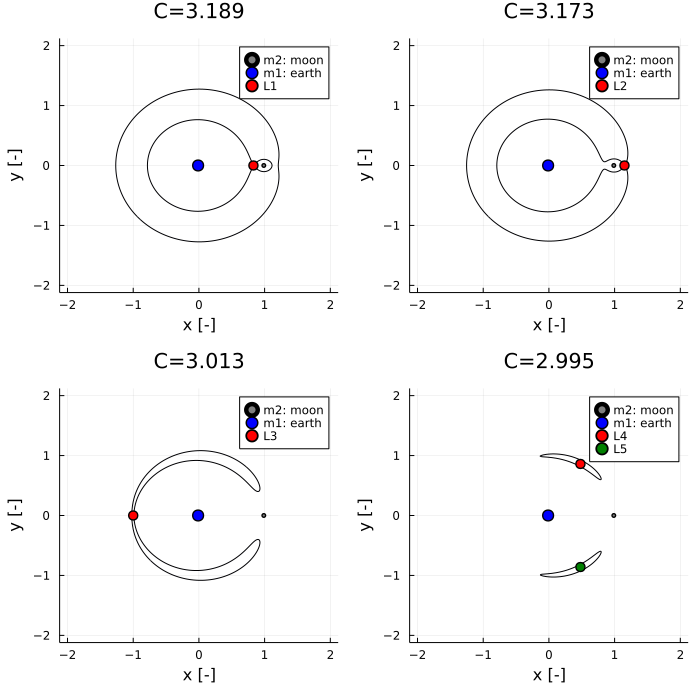

In [15]:
contour(x, y, z, levels=[jacobis[1];], layout=4, title="C=$(jacobis[1])", colorbar = false, size=(700,700),
    xlabel="x [-]", ylabel="y [-]")
contour!(x, y, z, levels=[jacobis[2]], subplot=2, title="C=$(jacobis[2])", size=(700,700), colorbar=false)
contour!(x, y, z, levels=[jacobis[3]], subplot=3, title="C=$(jacobis[3])", size=(700,700), colorbar=false)
contour!(x, y, z, levels=[jacobis[4]], subplot=4, title="C=$(jacobis[4])", size=(700,700), colorbar=false)

scatter!([1-mu_earthmoon],[0], color="gray", markersize = 2, label="m2: moon", subplot=1)
scatter!([-mu_earthmoon],[0], color="blue", markersize = 6, label="m1: earth", subplot=1)
scatter!([1-mu_earthmoon],[0], color="gray", markersize = 2, label="m2: moon", subplot=2)
scatter!([-mu_earthmoon],[0], color="blue", markersize = 6, label="m1: earth", subplot=2)
scatter!([1-mu_earthmoon],[0], color="gray", markersize = 2, label="m2: moon", subplot=3)
scatter!([-mu_earthmoon],[0], color="blue", markersize = 6, label="m1: earth", subplot=3)
scatter!([1-mu_earthmoon],[0], color="gray", markersize = 2, label="m2: moon", subplot=4)
scatter!([-mu_earthmoon],[0], color="blue", markersize = 6, label="m1: earth", subplot=4)

scatter!([0.83],[0], color="red", markersize = 5, label="L1", subplot=1)
scatter!([1.15],[0], color="red", markersize = 5, label="L2", subplot=2)
scatter!([-1.00],[0], color="red", markersize = 5, label="L3", subplot=3)
scatter!([0.48],[0.86], color="red", markersize = 5, label="L4", subplot=4)
scatter!([0.48],[-0.86], color="green", markersize = 5, label="L5", subplot=4)